In [1]:
import IO
import numpy as np
import matplotlib.pyplot as plt
import file_path
%matplotlib inline
DOWN, UP=0,1

2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


### Square Lattice

In [2]:
def square_HTE(beta, order):
    if order > 8:
        print "Not Implemented!"
        return
    r= 3.0/4.0
    c_list = [0]*9
    c_list[1] = r/3
    c_list[2] = -4.0/9.0*r**2
    c_list[3] = r**2/9*(4*r-1)
    c_list[4] = -2*r**2/405*3*(2-17*r+28*r**2)
    c_list[5] = r**2/4860*(-45+648*r-1808*r**2+1712*r**3)
    c_list[6] = -r**2/127575*2*(216-4131*r +18339*r**2-28710*r**3+18100*r**4)
    c_list[7] = r**2/3061800*(-4347 + 99738*r - 623943*r**2 + 1392666 *r **3
                        -1440944* r**4 + 673152 * r**5)
    c_list[8] = -r**2/91854000*3*(20520 - 536112*r + 4174761*r**2 - 12734370* r**3
                           + 18166056* r**4 - 13785984 * r**5 + 5028608 * r**6)
    return np.sum([3.0*c_list[i]*beta**i for i in range(1, order+1)])

In [3]:
def read_data(filename):
    data = IO.LoadBigDict(filename)
    if "GammaG" in data:
        rGammaG = np.array(data["GammaG"]["SmoothT"])
    elif "GGGammaG" in data:
        rGammaG = np.array(data["GGGammaG"]["SmoothT"])
    Chi = np.array(data["Chi"]["SmoothT"])[0,0,0,0,:,:]
    BKChi = None
    if "BKChi" in data:
        BKChi = np.array(data["BKChi"]["SmoothT"])[0,0,0,0,:,:]
    return (rGammaG, Chi, BKChi)

In [4]:
def get_static_uniform_chi(data, beta):
    avg=beta*np.average(np.sum(data.real,axis=0))
    return avg

In [5]:
def get_energy(data, beta):
    return data[1, 0].real*2

In [6]:
def get_error(data, order):
    error = 0.0
    if order > 1:
        unif = np.sum(data.real, axis=0)
        error = np.max(unif) - np.min(unif)
    return error + 0.0002

In [47]:
def get_chi00(data):
    return data[0, 0].real

In [7]:
for i in range(1, 9):
    print square_HTE(0.8, i)

0.6
0.12
0.312
0.2608
0.27744
0.2701696
0.271422293333
0.271738660571


In [8]:
T_list = np.linspace(0.5, 2.0, 100)
HTE_list = np.zeros((5, len(T_list)))

In [9]:
for t in range(len(T_list)):
    for i in range(5):
        order = i + 4
        HTE_list[i,t] = square_HTE(1.0/T_list[t], order)

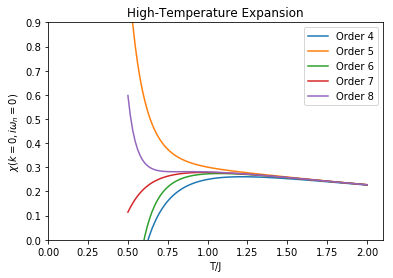

In [10]:
plt.figure()
for i in range(5):
    plt.plot(T_list, HTE_list[i], label="Order "+str(i+4))
#y=[0.0937,]*MaxTauBin
#plt.plot(TGrid, y, 'k--', label="Unbiased MC")
plt.ylim([0.0,0.9])
plt.xlim([0.0, 2.1])
plt.xlabel("T/J")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.legend()
plt.title("High-Temperature Expansion")

plt.savefig("square_High-Temperature.pdf")
plt.show()

In [11]:
rGammaG = {}
Chi = {}
BKChi = {}
DiagMC = {}
CDMC = {}
HTE_square = {}

In [35]:
beta = 1.0
n_order = 5

In [13]:
for i in range(1, n_order+1):
    print file_path.path("square", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("square", beta, i))

/mnt/data/GammaBK_square/Beta1.0/Beta1.0_Order1/Weight
/mnt/data/GammaBK_square/Beta1.0/Beta1.0_Order2/Weight
/mnt/data/GammaBK_square/Beta1.0/Beta1.0_Order3/Weight
/mnt/data/GammaBK_square/Beta1.0/Beta1.0_Order4/Weight
/mnt/data/GammaBK_square/Beta1.0/Beta1.0_Order5/Weight


In [20]:
DiagMC[beta] = np.zeros((n_order, 3))
DiagMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    DiagMC[beta][i-1,1] = get_static_uniform_chi(Chi[(beta, i)], beta)
    DiagMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta,i)], i)

In [21]:
CDMC[beta] = np.zeros((n_order, 3))
CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    CDMC[beta][i-1,1] = 3.0*get_static_uniform_chi(BKChi[(beta, i)], beta)
    CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta,i)], i)

In [27]:
Energy_DMC = {}
Energy_DMC[beta] = np.zeros((n_order, 3))
Energy_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_DMC[beta][i-1,1] = get_energy(Chi[(beta, i)], beta)
    Energy_DMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i)

Energy_CDMC = {}
Energy_CDMC[beta] = np.zeros((n_order, 3))
Energy_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_CDMC[beta][i-1,1] = 3.0*get_energy(BKChi[(beta, i)], beta)
    Energy_CDMC[beta][i-1,2] = 3.0*2.0*get_error(BKChi[(beta, i)], i)

In [23]:
HTE_Order = np.array(range(1, 9))
HTE_square[beta] = np.array([square_HTE(beta, order) for order in HTE_Order])

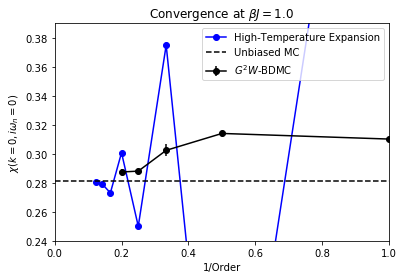

In [36]:
plt.figure()
plt.errorbar(1.0/DiagMC[beta][:,0], DiagMC[beta][:, 1], yerr=DiagMC[beta][:,2], c="k", label=r"$G^2W$-BDMC",fmt='o-')
#plt.errorbar(1.0/CDMC[beta][:,0], CDMC[beta][:, 1], yerr=CDMC[beta][:,2], label="CDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_square[beta],'o-', c='b', label="High-Temperature Expansion", )
y=[0.0937*3, 0.0937*3]
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
plt.ylim([0.24, 0.39])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("square_Convergence_Beta1.pdf")
plt.show()

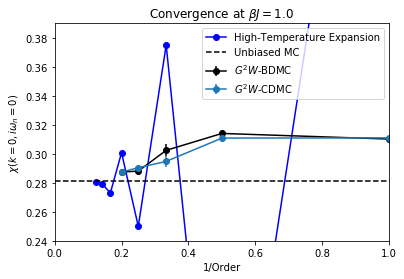

In [37]:
plt.figure()
plt.errorbar(1.0/DiagMC[beta][:,0], DiagMC[beta][:, 1], yerr=DiagMC[beta][:,2], c="k", label=r"$G^2W$-BDMC",fmt='o-')
plt.errorbar(1.0/CDMC[beta][:,0], CDMC[beta][:, 1], yerr=CDMC[beta][:,2], label=r"$G^2W$-CDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_square[beta],'o-', c='b', label="High-Temperature Expansion", )
y=[0.0937*3, 0.0937*3]
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
plt.ylim([0.24, 0.39])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("square_Convergence_Beta1_with_CDMC.pdf")
plt.show()

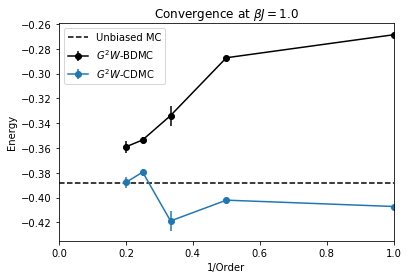

In [52]:
beta = 1.0
n_order = 5
plt.figure()
plt.errorbar(1.0/Energy_DMC[beta][:,0], Energy_DMC[beta][:, 1], yerr=Energy_DMC[beta][:,2], c="k", label=r"$G^2W$-BDMC",fmt='o-')
plt.errorbar(1.0/Energy_CDMC[beta][:,0], Energy_CDMC[beta][:, 1], yerr=Energy_CDMC[beta][:,2], label=r"$G^2W$-CDMC",fmt='o-')
y=[-0.3880]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel("Energy")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("square_Energy_Beta1_with_CDMC.pdf")
plt.show()

In [55]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

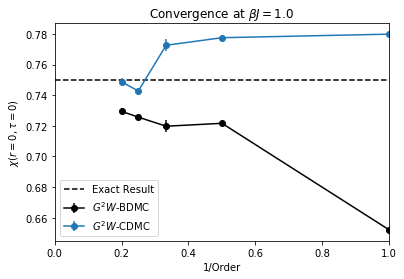

In [57]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="$G^2W$-BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="$G^2W$-CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J = 1.0$")
plt.legend()

plt.savefig("square_Sum_Rule_Beta1.pdf")
plt.show()

In [58]:
beta = 0.8
n_order = 5

for i in range(1, n_order+1):
    print file_path.path("square", beta, i)
    rGammaG[(beta, i)], Chi[(beta, i)], BKChi[(beta, i)] = read_data(file_path.path("square", beta, i))

/mnt/data/GammaBK_square/Beta0.8/Beta0.8_Tau32_L8/Weight
/mnt/data/GammaBK_square/Beta0.8/Beta0.8_Order2/Weight
/mnt/data/GammaBK_square/Beta0.8/Beta0.8_Order3/Weight
/mnt/data/GammaBK_square/Beta0.8/Beta0.8_Order4/Weight
/mnt/data/GammaBK_square/Beta0.8/Beta0.8_Order5/Weight


In [59]:
DiagMC[beta] = np.zeros((n_order, 3))
DiagMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    DiagMC[beta][i-1,1] = 3.0*get_static_uniform_chi(Chi[(beta, i)], beta)
    DiagMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta,i)], i)

In [60]:
CDMC[beta] = np.zeros((n_order, 3))
CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    CDMC[beta][i-1,1] = 3.0*get_static_uniform_chi(BKChi[(beta, i)], beta)
    CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

In [61]:
Energy_DMC[beta] = np.zeros((n_order, 3))
Energy_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_DMC[beta][i-1,1] = 3.0*get_energy(Chi[(beta, i)], beta)
    Energy_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta,i)], i)

Energy_CDMC[beta] = np.zeros((n_order, 3))
Energy_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Energy_CDMC[beta][i-1,1] = 3.0*get_energy(BKChi[(beta, i)], beta)
    Energy_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta,i)], i)

In [62]:
HTE_Order = np.array(range(1, 9))
HTE_square[beta] = np.array([square_HTE(beta, order) for order in HTE_Order])

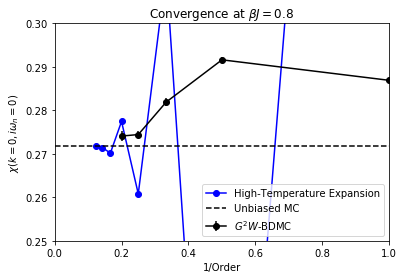

In [68]:
plt.figure()
plt.errorbar(1.0/DiagMC[beta][:,0], DiagMC[beta][:, 1], yerr=DiagMC[beta][:,2], c="k", label="$G^2W$-BDMC",fmt='o-')
#plt.errorbar(1.0/CDMC[beta][:,0], CDMC[beta][:, 1], yerr=CDMC[beta][:,2], label="$G^2W$-CDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_square[beta],'o-', c='b', label="High-Temperature Expansion", )
y=[0.0906*3]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 0.8$")
plt.legend()

plt.savefig("square_Convergence_Beta08.pdf")
plt.show()

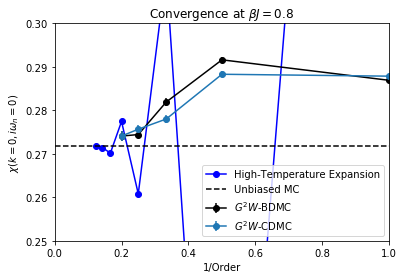

In [69]:
plt.figure()
plt.errorbar(1.0/DiagMC[beta][:,0], DiagMC[beta][:, 1], yerr=DiagMC[beta][:,2], c="k", label="$G^2W$-BDMC",fmt='o-')
plt.errorbar(1.0/CDMC[beta][:,0], CDMC[beta][:, 1], yerr=CDMC[beta][:,2], label="$G^2W$-CDMC",fmt='o-')
plt.plot(1.0/HTE_Order, HTE_square[beta],'o-', c='b', label="High-Temperature Expansion", )
y=[0.0906*3]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.title(r"Convergence at $\beta J = 0.8$")
plt.legend()

plt.savefig("square_Convergence_Beta08_with_CDMC.pdf")
plt.show()

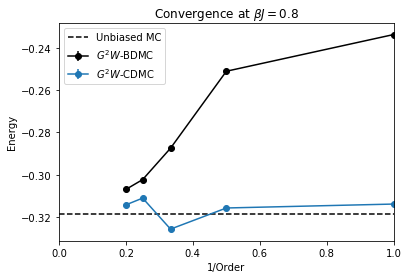

In [70]:
plt.figure()
plt.errorbar(1.0/Energy_DMC[beta][:,0], Energy_DMC[beta][:, 1], yerr=Energy_DMC[beta][:,2], c="k", label="$G^2W$-BDMC",fmt='o-')
plt.errorbar(1.0/Energy_CDMC[beta][:,0], Energy_CDMC[beta][:, 1], yerr=Energy_CDMC[beta][:,2], label="$G^2W$-CDMC",fmt='o-')
y=[-0.3185]*2
plt.plot([0.0, 1.0], y, 'k--', label="Unbiased MC")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel("Energy")
plt.title(r"Convergence at $\beta J = 0.8$")
plt.legend()

plt.savefig("square_Energy_Beta08_with_CDMC.pdf")
plt.show()

In [66]:
Chi00_DMC = {}
Chi00_DMC[beta] = np.zeros((n_order, 3))
Chi00_DMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_DMC[beta][i-1,1] = 3.0*get_chi00(Chi[(beta, i)])
    Chi00_DMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i) 
    
Chi00_CDMC = {}
Chi00_CDMC[beta] = np.zeros((n_order, 3))
Chi00_CDMC[beta][:,0] = np.array(range(1, n_order+1))
for i in range(1, n_order+1):
    Chi00_CDMC[beta][i-1,1] = 3.0*get_chi00(BKChi[(beta, i)])
    Chi00_CDMC[beta][i-1,2] = 3.0*get_error(BKChi[(beta, i)], i)

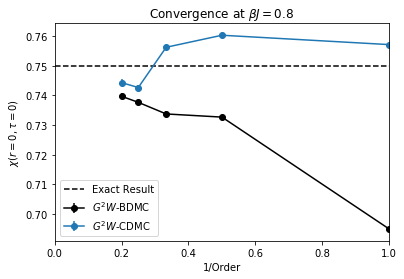

In [67]:
plt.figure()
plt.errorbar(1.0/Chi00_DMC[beta][:,0], Chi00_DMC[beta][:, 1], yerr=Chi00_DMC[beta][:,2], c="k", label="$G^2W$-BDMC",fmt='o-')
plt.errorbar(1.0/Chi00_CDMC[beta][:,0], Chi00_CDMC[beta][:, 1], yerr=Chi00_CDMC[beta][:,2], label="$G^2W$-CDMC",fmt='o-')
y=[0.75]*2
plt.plot([0.0, 1.0], y, 'k--', label="Exact Result")
#plt.ylim([0.25, 0.3])
plt.xlim([0,1])
plt.xlabel("1/Order")
plt.ylabel(r"$\chi(r=0, \tau=0)$")
plt.title(r"Convergence at $\beta J = 0.8$")
plt.legend()

plt.savefig("square_Sum_Rule_Beta08.pdf")
plt.show()